<a href="https://colab.research.google.com/github/kabeerbora/1980s_delin/blob/main/visualizations_delin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

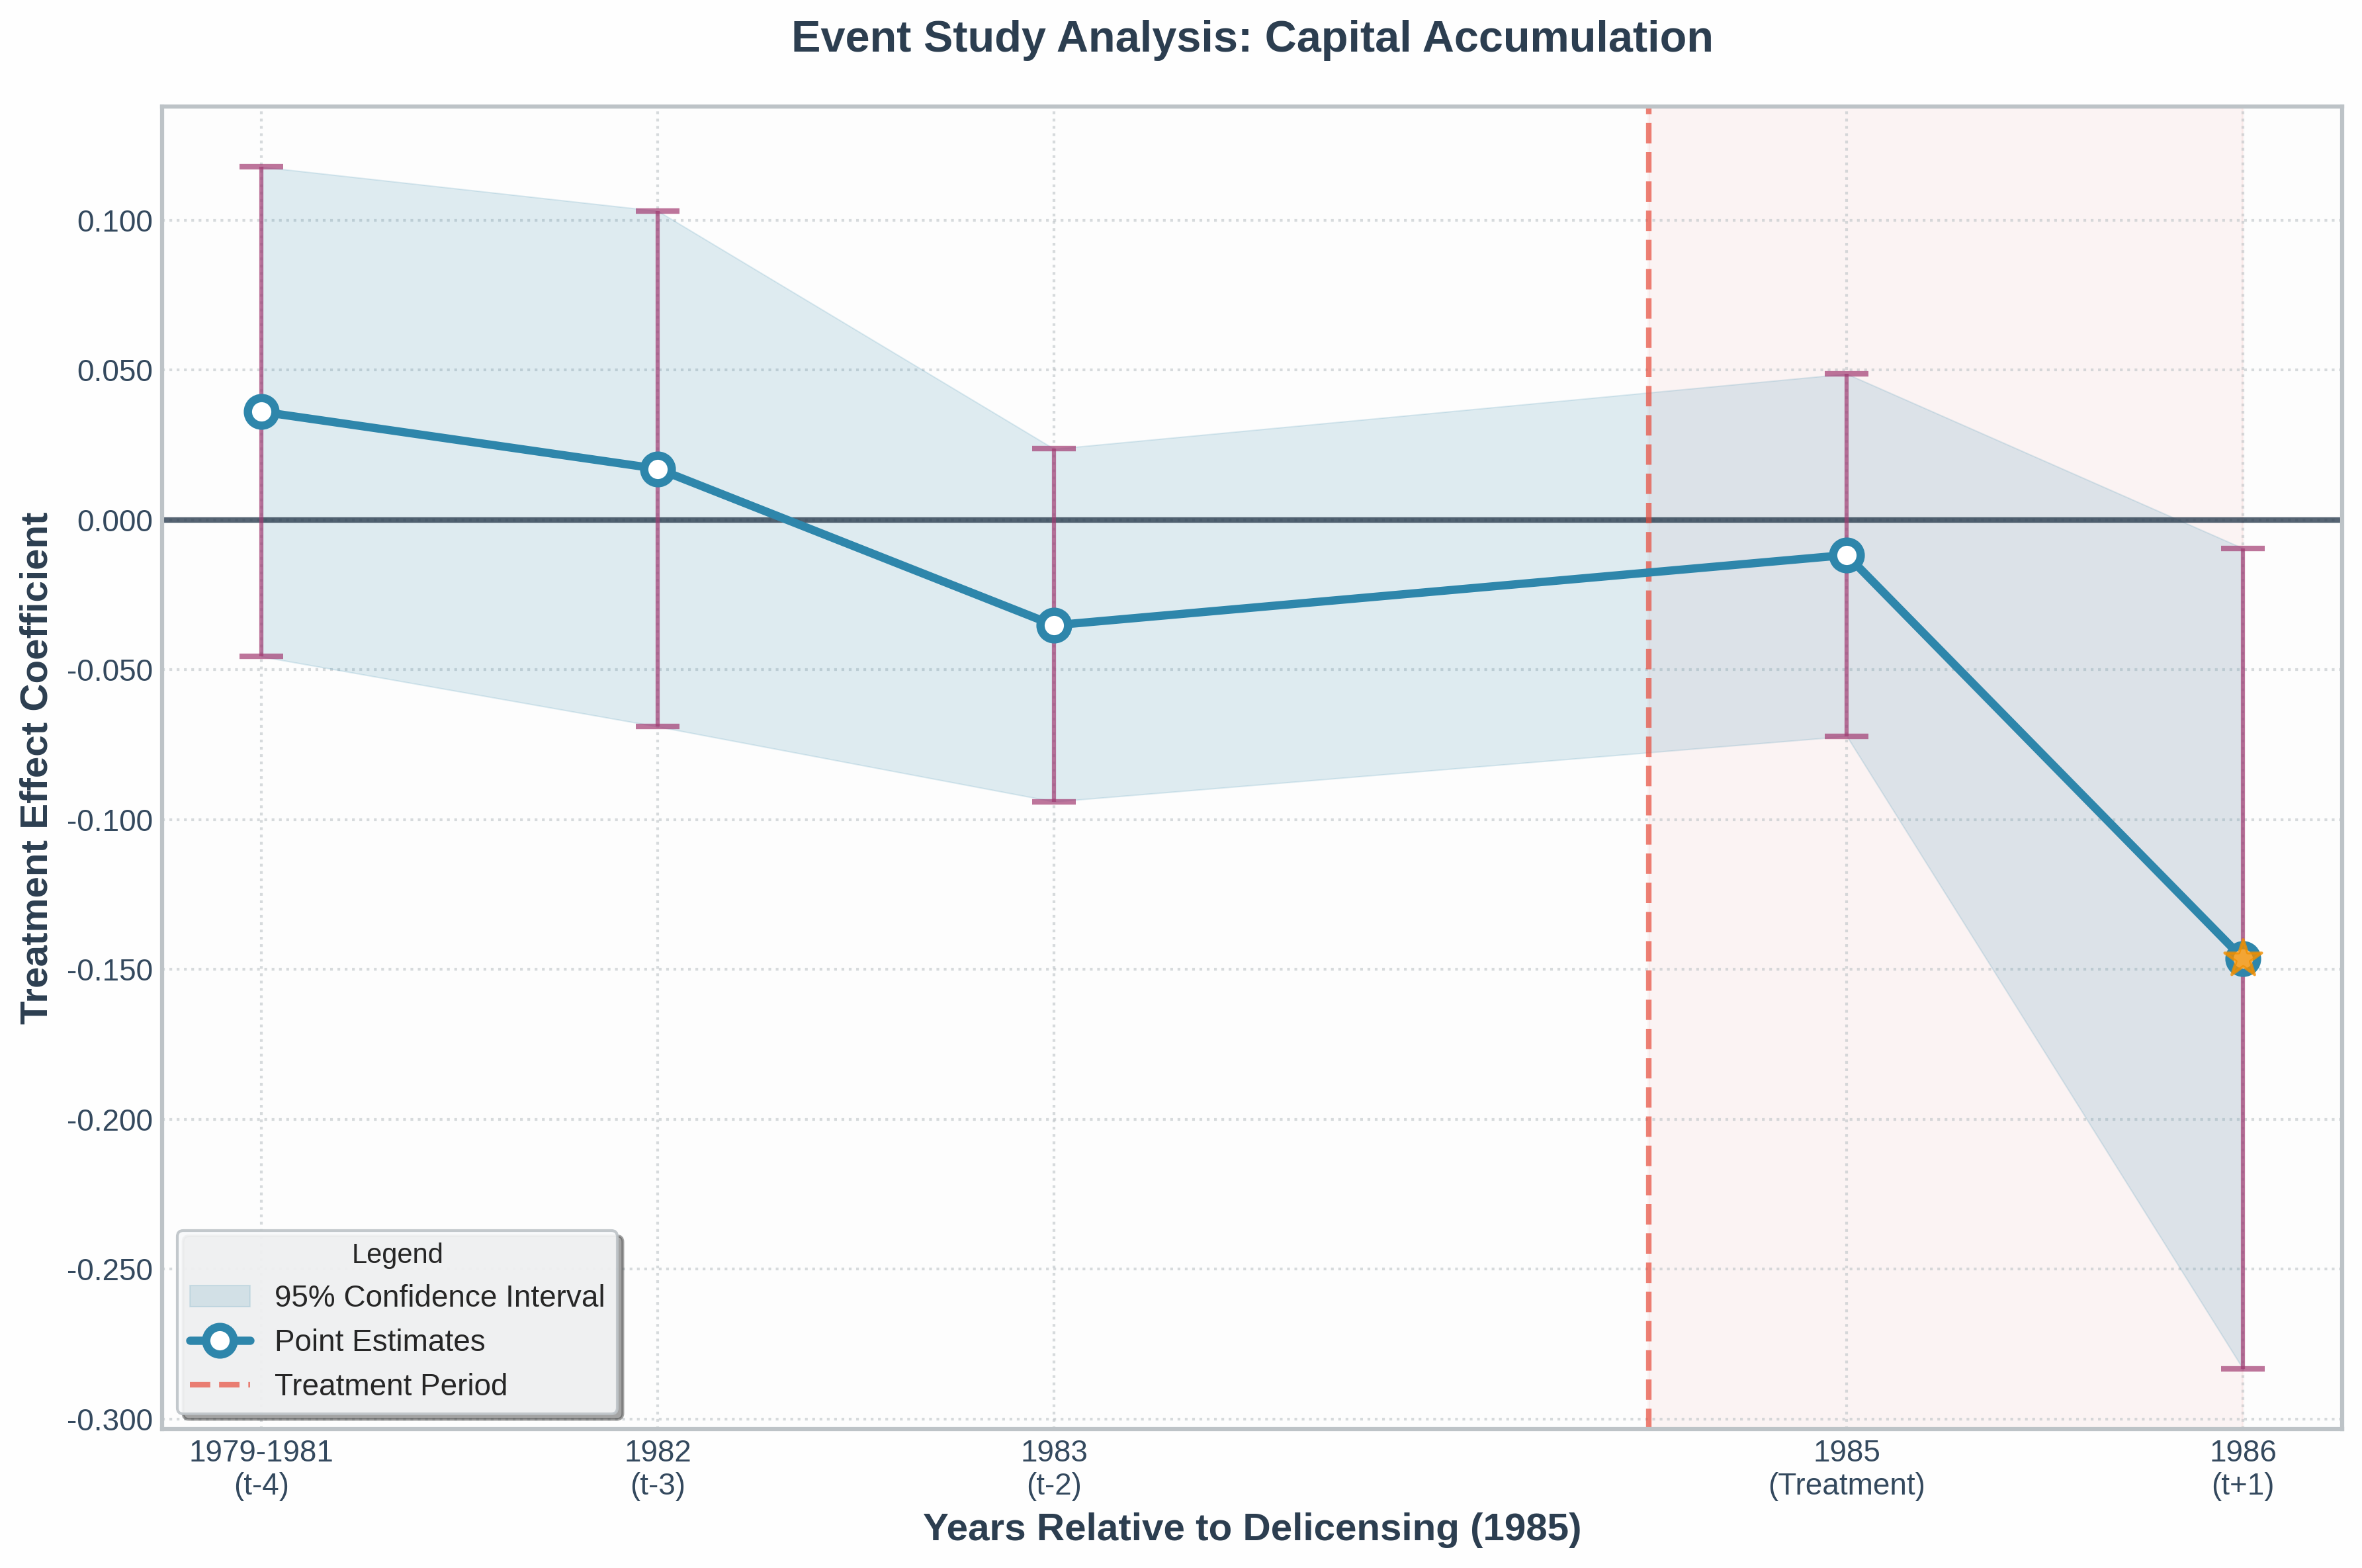

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
time_points = [-4, -3, -2, 0, 1]
estimates = [0.036132, 0.017091, -0.035123, -0.011674, -0.146366]
std_errors = [0.041686, 0.043894, 0.030023, 0.030839, 0.069850]
ci_lower = [est - 1.96 * se for est, se in zip(estimates, std_errors)]
ci_upper = [est + 1.96 * se for est, se in zip(estimates, std_errors)]

fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
primary_color = '#2E86AB'
secondary_color = '#A23B72'
accent_color = '#F18F01'
neutral_color = '#C73E1D'
ax.fill_between(time_points, ci_lower, ci_upper,
                color=primary_color, alpha=0.15,
                label='95% Confidence Interval',
                edgecolor=primary_color, linewidth=0.5)

ax.plot(time_points, estimates,
        color=primary_color, linewidth=3,
        marker='o', markersize=10,
        markerfacecolor='white',
        markeredgecolor=primary_color,
        markeredgewidth=3,
        label='Point Estimates',
        zorder=5)

ax.errorbar(time_points, estimates, yerr=[1.96 * se for se in std_errors],
            fmt='none', ecolor=secondary_color, capsize=8, capthick=2,
            alpha=0.7, zorder=4)
for i, (point, est, lower, upper) in enumerate(zip(time_points, estimates, ci_lower, ci_upper)):
    if lower > 0 or upper < 0:
        ax.scatter(point, est, s=200, color=accent_color,
                  marker='*', zorder=6, alpha=0.8)

ax.axhline(y=0, color='#2C3E50', linestyle='-', alpha=0.8, linewidth=2, zorder=1)
ax.axvline(x=-0.5, color='#E74C3C', linestyle='--', alpha=0.7, linewidth=2,
           label='Treatment Period', zorder=1)
ax.axvspan(-0.5, max(time_points), alpha=0.05, color='#E74C3C', zorder=0)

ax.set_xlabel('Years Relative to Delicensing (1985)', fontsize=14, fontweight='bold', color='#2C3E50')
ax.set_ylabel('Treatment Effect Coefficient', fontsize=14, fontweight='bold', color='#2C3E50')
ax.set_title('Event Study Analysis: Capital Accumulation',
             fontsize=16, fontweight='bold', color='#2C3E50', pad=20)

ax.set_xticks(ticks=[-4, -3, -2, 0, 1])
ax.set_xticklabels(['1979-1981\n(t-4)', '1982\n(t-3)', '1983\n(t-2)',
                    '1985\n(Treatment)', '1986\n(t+1)'],
                   fontsize=11, color='#34495E')

ax.tick_params(axis='y', labelsize=11, colors='#34495E')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))

ax.grid(True, linestyle=':', alpha=0.6, color='#BDC3C7', linewidth=1)
ax.set_axisbelow(True)
legend = ax.legend(loc='lower left', frameon=True, fancybox=True,
                   shadow=True, fontsize=11, title='Legend')
legend.get_frame().set_facecolor('#F8F9FA')
legend.get_frame().set_edgecolor('#BDC3C7')
legend.get_frame().set_alpha(0.9)

plt.tight_layout()
for spine in ax.spines.values():
    spine.set_edgecolor('#BDC3C7')
    spine.set_linewidth(1.5)
fig.patch.set_facecolor('#FEFEFE')
ax.set_facecolor('#FDFDFD')
plt.show()

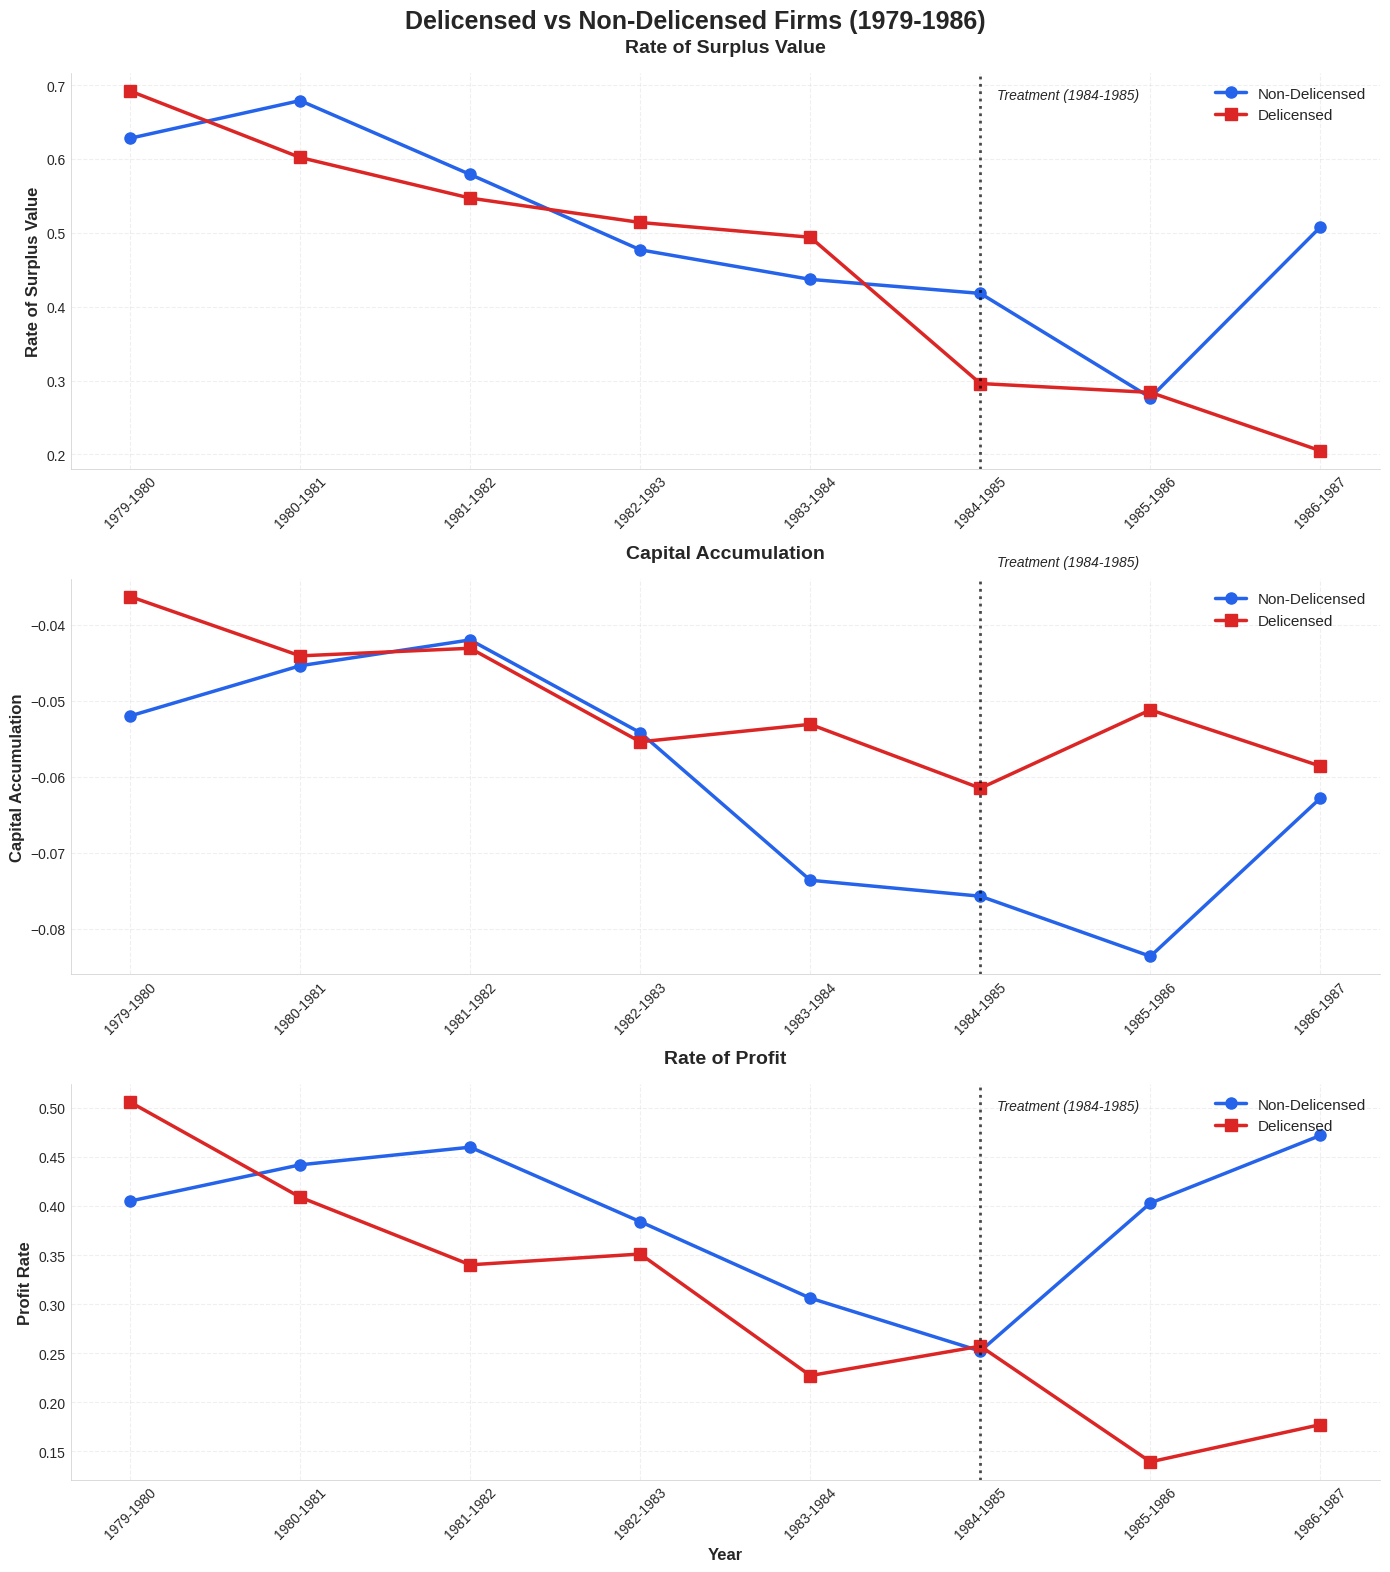

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ROSV data
rosv_data = {
    'year': ['1979_1980', '1979_1980', '1980_1981', '1980_1981', '1981_1982', '1981_1982',
             '1982_1983', '1982_1983', '1983_1984', '1983_1984', '1984_1985', '1984_1985',
             '1985_1986', '1985_1986', '1986_1987', '1986_1987'],
    'delin_group': [False, True, False, True, False, True, False, True, False, True,
                    False, True, False, True, False, True],
    'mean_rosv': [0.628, 0.692, 0.679, 0.602, 0.579, 0.547, 0.477, 0.514, 0.437, 0.494,
                  0.418, 0.296, 0.277, 0.284, 0.508, 0.205],
    'delin_group_label': ['Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed']
}

# Capital formation data
capital_data = {
    'year': ['1979_1980', '1979_1980', '1980_1981', '1980_1981', '1981_1982', '1981_1982',
             '1982_1983', '1982_1983', '1983_1984', '1983_1984', '1984_1985', '1984_1985',
             '1985_1986', '1985_1986', '1986_1987', '1986_1987'],
    'delin_group': [False, True, False, True, False, True, False, True, False, True,
                    False, True, False, True, False, True],
    'mean_k_form': [-0.0520, -0.0363, -0.0454, -0.0441, -0.0420, -0.0431, -0.0542, -0.0554,
                    -0.0736, -0.0531, -0.0757, -0.0615, -0.0836, -0.0512, -0.0628, -0.0586],
    'delin_group_label': ['Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed']
}

# Rate of profit data
profit_data = {
    'year': ['1979_1980', '1979_1980', '1980_1981', '1980_1981', '1981_1982', '1981_1982',
             '1982_1983', '1982_1983', '1983_1984', '1983_1984', '1984_1985', '1984_1985',
             '1985_1986', '1985_1986', '1986_1987', '1986_1987'],
    'delin_group': [False, True, False, True, False, True, False, True, False, True,
                    False, True, False, True, False, True],
    'mean_profit_rate': [0.405, 0.506, 0.442, 0.409, 0.460, 0.340, 0.384, 0.351, 0.306, 0.227,
                         0.252, 0.257, 0.403, 0.139, 0.472, 0.177],
    'delin_group_label': ['Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed',
                          'Non-Delicensed', 'Delicensed', 'Non-Delicensed', 'Delicensed']
}

# Create DataFrames
df_rosv = pd.DataFrame(rosv_data)
df_capital = pd.DataFrame(capital_data)
df_profit = pd.DataFrame(profit_data)

# Convert year to numeric for plotting (use start year)
for df in [df_rosv, df_capital, df_profit]:
    df['year_numeric'] = df['year'].str[:4].astype(int)

fig, axes = plt.subplots(3, 1, figsize=(14, 16))
fig.suptitle('Delicensed vs Non-Delicensed Firms (1979-1986)',
             fontsize=18, fontweight='bold', y=0.98)

# Colors for consistency
colors = {'Non-Delicensed': '#2563eb', 'Delicensed': '#dc2626'}
markers = {'Non-Delicensed': 'o', 'Delicensed': 's'}

# Treatment year (1984-1985)
treatment_year = 1984

# Plot 1: ROSV
for group in [False, True]:
    data_subset = df_rosv[df_rosv['delin_group'] == group]
    label = 'Non-Delicensed' if not group else 'Delicensed'
    axes[0].plot(data_subset['year_numeric'], data_subset['mean_rosv'],
                marker=markers[label], linewidth=2.5, markersize=8,
                label=label, color=colors[label])

# Add vertical line for treatment
axes[0].axvline(x=treatment_year, color='black', linestyle=':', alpha=0.7, linewidth=2)
axes[0].text(treatment_year+0.1, axes[0].get_ylim()[1]*0.95, 'Treatment (1984-1985)',
            fontsize=10, style='italic')

axes[0].set_title('Rate of Surplus Value', fontsize=14, fontweight='bold', pad=15)
axes[0].set_ylabel('Rate of Surplus Value', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].legend(fontsize=11, loc='upper right')

# Plot 2: Capital Formation
for group in [False, True]:
    data_subset = df_capital[df_capital['delin_group'] == group]
    label = 'Non-Delicensed' if not group else 'Delicensed'
    axes[1].plot(data_subset['year_numeric'], data_subset['mean_k_form'],
                marker=markers[label], linewidth=2.5, markersize=8,
                label=label, color=colors[label])

# Add vertical line for treatment
axes[1].axvline(x=treatment_year, color='black', linestyle=':', alpha=0.7, linewidth=2)
axes[1].text(treatment_year+0.1, axes[1].get_ylim()[1]*0.95, 'Treatment (1984-1985)',
            fontsize=10, style='italic')

axes[1].set_title('Capital Accumulation', fontsize=14, fontweight='bold', pad=15)
axes[1].set_ylabel('Capital Accumulation', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend(fontsize=11, loc='upper right')

# Plot 3: Rate of Profit
for group in [False, True]:
    data_subset = df_profit[df_profit['delin_group'] == group]
    label = 'Non-Delicensed' if not group else 'Delicensed'
    axes[2].plot(data_subset['year_numeric'], data_subset['mean_profit_rate'],
                marker=markers[label], linewidth=2.5, markersize=8,
                label=label, color=colors[label])

# Add vertical line for treatment
axes[2].axvline(x=treatment_year, color='black', linestyle=':', alpha=0.7, linewidth=2)
axes[2].text(treatment_year+0.1, axes[2].get_ylim()[1]*0.95, 'Treatment (1984-1985)',
            fontsize=10, style='italic')

axes[2].set_title('Rate of Profit', fontsize=14, fontweight='bold', pad=15)
axes[2].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Profit Rate', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3, linestyle='--')
axes[2].legend(fontsize=11, loc='upper right')

# Customize all subplots
years = df_rosv[df_rosv['delin_group'] == False]['year_numeric'].values
for ax in axes:
    ax.set_xticks(years)
    ax.set_xticklabels([f"{y}-{y+1}" for y in years], rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)

plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()


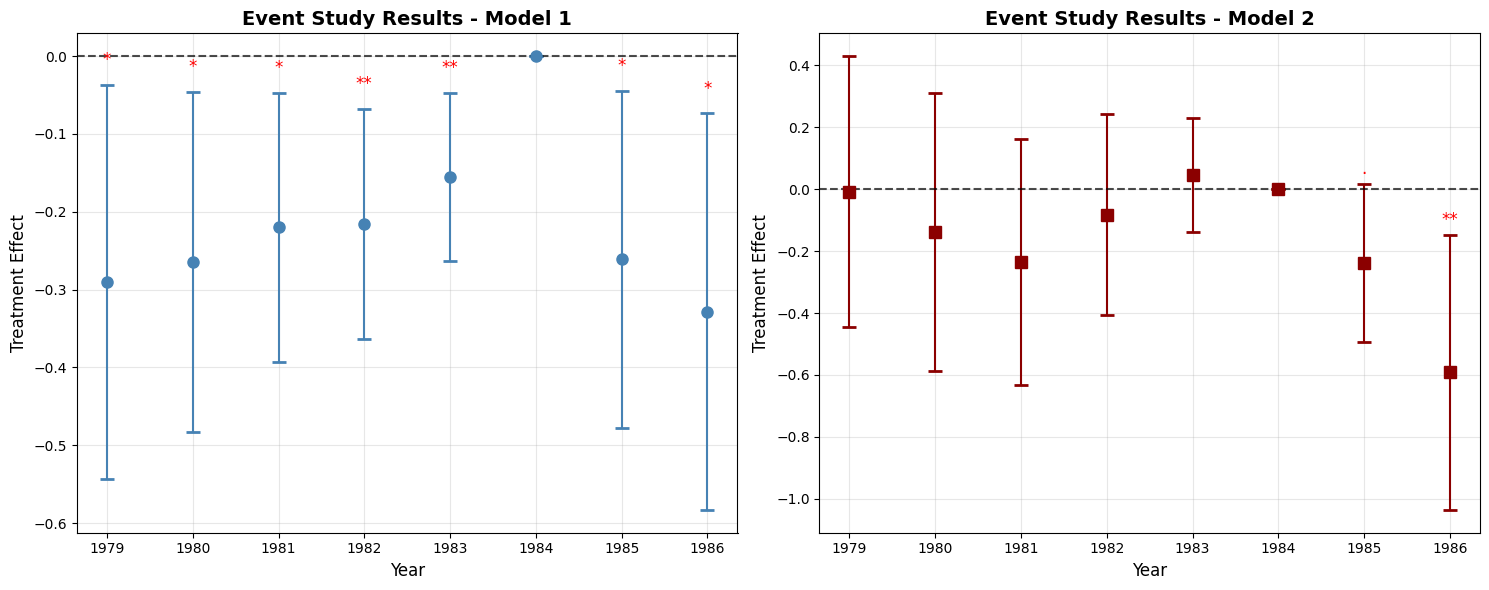

Model 1 Summary:
Mean coefficient: -0.2168
Significant effects (p<0.05): 7/8

Model 2 Summary:
Mean coefficient: -0.1563
Significant effects (p<0.05): 1/8


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Parse the first set of results
data1 = {
    'year': [1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986],
    'coefficient': [-2.900852e-01, -2.642629e-01, -2.199873e-01, -2.157343e-01,
                   -1.552386e-01, 0.0, -2.610438e-01, -3.282026e-01],
    'std_error': [1.290579e-01, 1.113268e-01, 8.832351e-02, 7.534915e-02,
                 5.524365e-02, 0.0, 1.104652e-01, 1.300527e-01],
    'p_value': [0.0258577, 0.0187043, 0.0136922, 0.0047136, 0.0055240, 1.0, 0.0192316, 0.0125165]
}

# Parse the second set of results
data2 = {
    'year': [1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986],
    'coefficient': [-8.677749e-03, -1.382711e-01, -2.352491e-01, -8.267561e-02,
                   4.538004e-02, 0.0, -2.393838e-01, -5.916124e-01],
    'std_error': [2.233807e-01, 2.284553e-01, 2.025398e-01, 1.657485e-01,
                 9.351725e-02, 0.0, 1.304513e-01, 2.265738e-01],
    'p_value': [0.969057, 0.545810, 0.247040, 0.618553, 0.628107, 1.0, 0.068217, 0.009817]
}

# Create DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Calculate 95% confidence intervals
df1['ci_lower'] = df1['coefficient'] - 1.96 * df1['std_error']
df1['ci_upper'] = df1['coefficient'] + 1.96 * df1['std_error']
df2['ci_lower'] = df2['coefficient'] - 1.96 * df2['std_error']
df2['ci_upper'] = df2['coefficient'] + 1.96 * df2['std_error']

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: First set of results
ax1.errorbar(df1['year'], df1['coefficient'],
            yerr=[df1['coefficient'] - df1['ci_lower'], df1['ci_upper'] - df1['coefficient']],
            fmt='o', capsize=5, capthick=2, color='steelblue', markersize=8)

# Add significance indicators
for i, row in df1.iterrows():
    if row['p_value'] < 0.001:
        marker = '***'
    elif row['p_value'] < 0.01:
        marker = '**'
    elif row['p_value'] < 0.05:
        marker = '*'
    elif row['p_value'] < 0.1:
        marker = '.'
    else:
        marker = ''

    if marker:
        ax1.text(row['year'], row['ci_upper'] + 0.02, marker,
                ha='center', va='bottom', fontsize=12, color='red')

ax1.axhline(y=0, color='black', linestyle='--', alpha=0.7)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Treatment Effect', fontsize=12)
ax1.set_title('Event Study Results - Model 1', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(df1['year'])

# Plot 2: Second set of results
ax2.errorbar(df2['year'], df2['coefficient'],
            yerr=[df2['coefficient'] - df2['ci_lower'], df2['ci_upper'] - df2['coefficient']],
            fmt='s', capsize=5, capthick=2, color='darkred', markersize=8)

# Add significance indicators
for i, row in df2.iterrows():
    if row['p_value'] < 0.001:
        marker = '***'
    elif row['p_value'] < 0.01:
        marker = '**'
    elif row['p_value'] < 0.05:
        marker = '*'
    elif row['p_value'] < 0.1:
        marker = '.'
    else:
        marker = ''

    if marker:
        ax2.text(row['year'], row['ci_upper'] + 0.02, marker,
                ha='center', va='bottom', fontsize=12, color='red')

ax2.axhline(y=0, color='black', linestyle='--', alpha=0.7)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Treatment Effect', fontsize=12)
ax2.set_title('Event Study Results - Model 2', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(df2['year'])

plt.tight_layout()
plt.show()

# Print summary statistics
print("Model 1 Summary:")
print(f"Mean coefficient: {df1['coefficient'].mean():.4f}")
print(f"Significant effects (p<0.05): {sum(df1['p_value'] < 0.05)}/{len(df1)}")
print()
print("Model 2 Summary:")
print(f"Mean coefficient: {df2['coefficient'].mean():.4f}")
print(f"Significant effects (p<0.05): {sum(df2['p_value'] < 0.05)}/{len(df2)}")


In [4]:
import pandas as pd

data = [
    {"NIC_Code": "230", "Description": "Cotton ginning bailing & cleaning", "GVA_Share": 0.35, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 0.0, "ICR_1986-90": 0.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.099, "IPR_1986-90": 0.035, "IPR_1991-95": 0.039, "IPR_1996-00": 0.001, "Delicensed": "No"},
    {"NIC_Code": "230,231,235", "Description": "Cotton Textiles", "GVA_Share": 11.62, "ERP_1980-85": 109.77, "ERP_1986-90": 125.38, "ERP_1991-95": 68.38, "ERP_1996-00": 42.93, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "Yes"},
    {"NIC_Code": "231", "Description": "Cotton spinning not in Mills", "GVA_Share": 0.0, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 0.0, "ICR_1986-90": 0.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "Yes"},
    {"NIC_Code": "232", "Description": "W&F cotton Khadi", "GVA_Share": 0.01, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 0.0, "ICR_1986-90": 0.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "Yes"},
    {"NIC_Code": "232,233", "Description": "Cotton Khadi & Handloom", "GVA_Share": 0.06, "ERP_1980-85": 109.36, "ERP_1986-90": 126.85, "ERP_1991-95": 70.95, "ERP_1996-00": 42.99, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "Yes"},
    {"NIC_Code": "233", "Description": "W&F of Cotton- Handloom", "GVA_Share": 0.05, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 0.0, "ICR_1986-90": 0.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "Yes"},
    {"NIC_Code": "234", "Description": "W&F of Cotton-Powerloom", "GVA_Share": 0.1, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 0.0, "ICR_1986-90": 0.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "234,236", "Description": "Power looms & Printed Cotton", "GVA_Share": 0.49, "ERP_1980-85": 109.77, "ERP_1986-90": 125.38, "ERP_1991-95": 68.38, "ERP_1996-00": 42.93, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "235", "Description": "Cotton spinning in Mills", "GVA_Share": 11.27, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 100.0, "ICR_1996-00": 100.0, "IPR_1980-85": 0.0, "IPR_1986-90": 0.0, "IPR_1991-95": 0.002, "IPR_1996-00": 0.003, "Delicensed": "No"},
    {"NIC_Code": "236", "Description": "Printing of Cotton Textiles", "GVA_Share": 0.39, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 100.0, "ICR_1996-00": 100.0, "IPR_1980-85": 0.002, "IPR_1986-90": 0.025, "IPR_1991-95": 0.035, "IPR_1996-00": 0.048, "Delicensed": "No"},
    {"NIC_Code": "260", "Description": "Knitted or Crocheted Textiles", "GVA_Share": 0.18, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 99.96, "ICR_1996-00": 97.38, "IPR_1980-85": 0.002, "IPR_1986-90": 0.019, "IPR_1991-95": 0.008, "IPR_1996-00": 0.031, "Delicensed": "No"},
    {"NIC_Code": "260,265,267", "Description": "Textiles", "GVA_Share": 0.6, "ERP_1980-85": 138.33, "ERP_1986-90": 149.89, "ERP_1991-95": 98.45, "ERP_1996-00": 54.25, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "262", "Description": "Threads Cordage etc", "GVA_Share": 0.06, "ERP_1980-85": 160.91, "ERP_1986-90": 151.23, "ERP_1991-95": 95.79, "ERP_1996-00": 48.22, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 75.48, "ICR_1996-00": 18.92, "IPR_1980-85": 0.007, "IPR_1986-90": 0.007, "IPR_1991-95": 0.023, "IPR_1996-00": -0.053, "Delicensed": "No"},
    {"NIC_Code": "263", "Description": "Blankets Shawls Rugs etc", "GVA_Share": 0.1, "ERP_1980-85": 102.52, "ERP_1986-90": 91.8, "ERP_1991-95": 63.3, "ERP_1996-00": 44.66, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 100.0, "ICR_1996-00": 69.49, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "265", "Description": "Textile Garments &Accessories", "GVA_Share": 0.41, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 78.57, "ICR_1996-00": 74.3, "IPR_1980-85": 0.001, "IPR_1986-90": 0.001, "IPR_1991-95": 0.098, "IPR_1996-00": 0.566, "Delicensed": "No"},
    {"NIC_Code": "267", "Description": "Made-Up Textiles", "GVA_Share": 0.01, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 59.64, "ICR_1996-00": 16.45, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "268", "Description": "Water-Proof Textiles", "GVA_Share": 0.09, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 82.55, "ICR_1996-00": 0.21, "IPR_1980-85": 0.013, "IPR_1986-90": 0.017, "IPR_1991-95": 0.044, "IPR_1996-00": 0.291, "Delicensed": "No"},
    {"NIC_Code": "268,269", "Description": "Water Proof Textiles & others", "GVA_Share": 0.12, "ERP_1980-85": 160.91, "ERP_1986-90": 151.23, "ERP_1991-95": 95.79, "ERP_1996-00": 48.2, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "269", "Description": "Textile Products nec", "GVA_Share": 0.03, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 17.99, "ICR_1996-00": 0.67, "IPR_1980-85": 0.23, "IPR_1986-90": 0.223, "IPR_1991-95": 0.231, "IPR_1996-00": 0.26, "Delicensed": "No"},
    {"NIC_Code": "290", "Description": "Tanning & Curing of Leather", "GVA_Share": 0.36, "ERP_1980-85": 117.73, "ERP_1986-90": 123.15, "ERP_1991-95": 78.86, "ERP_1996-00": 52.42, "ICR_1980-85": 0.0, "ICR_1986-90": 0.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.004, "IPR_1986-90": 0.027, "IPR_1991-95": 0.14, "IPR_1996-00": 0.096, "Delicensed": "No"},
    {"NIC_Code": "291", "Description": "Leather Footwear", "GVA_Share": 0.36, "ERP_1980-85": 151.87, "ERP_1986-90": 158.49, "ERP_1991-95": 91.57, "ERP_1996-00": 35.71, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 100.0, "ICR_1996-00": 100.0, "IPR_1980-85": 0.003, "IPR_1986-90": 0.001, "IPR_1991-95": 0.0, "IPR_1996-00": 0.0, "Delicensed": "No"},
    {"NIC_Code": "292", "Description": "Apparel of Leather & Subs", "GVA_Share": 0.01, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 100.0, "ICR_1996-00": 100.0, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "Yes"},
    {"NIC_Code": "292,293,299", "Description": "Leather Products", "GVA_Share": 0.01, "ERP_1980-85": 117.73, "ERP_1986-90": 123.15, "ERP_1991-95": 78.86, "ERP_1996-00": 52.42, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "Yes"},
    {"NIC_Code": "293", "Description": "Leather Products & Substitutes", "GVA_Share": 0.0, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 100.0, "ICR_1996-00": 100.0, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "Yes"},
    {"NIC_Code": "299", "Description": "Leather & Fur Products nec", "GVA_Share": 0.0, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 38.42, "ICR_1996-00": 30.31, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "300", "Description": "Organic & Inorganic Chemical", "GVA_Share": 3.54, "ERP_1980-85": 95.85, "ERP_1986-90": 115.9, "ERP_1991-95": 85.79, "ERP_1996-00": 38.94, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 0.22, "ICR_1996-00": 0.22, "IPR_1980-85": 0.096, "IPR_1986-90": 0.234, "IPR_1991-95": 0.428, "IPR_1996-00": 0.469, "Delicensed": "No"},
    {"NIC_Code": "301", "Description": "Fertlizer & Pesticides", "GVA_Share": 3.46, "ERP_1980-85": 50.79, "ERP_1986-90": 60.05, "ERP_1991-95": 60.49, "ERP_1996-00": 28.7, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 100.0, "ICR_1996-00": 40.7, "IPR_1980-85": 0.156, "IPR_1986-90": 0.087, "IPR_1991-95": 0.111, "IPR_1996-00": 0.089, "Delicensed": "No"},
    {"NIC_Code": "302+306", "Description": "Synthetic Rub & Fibres", "GVA_Share": 1.5, "ERP_1980-85": 173.07, "ERP_1986-90": 157.73, "ERP_1991-95": 78.75, "ERP_1996-00": 40.63, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 22.61, "ICR_1996-00": 4.08, "IPR_1980-85": 0.099, "IPR_1986-90": 0.057, "IPR_1991-95": 0.164, "IPR_1996-00": 0.156, "Delicensed": "Yes"},
    {"NIC_Code": "303", "Description": "Paints Varnishes etc", "GVA_Share": 1.18, "ERP_1980-85": 171.73, "ERP_1986-90": 434.42, "ERP_1991-95": 123.36, "ERP_1996-00": 39.17, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 25.75, "ICR_1996-00": 6.3, "IPR_1980-85": 0.02, "IPR_1986-90": 0.084, "IPR_1991-95": 0.07, "IPR_1996-00": 0.084, "Delicensed": "No"},
    {"NIC_Code": "304", "Description": "Drugs & Medicines", "GVA_Share": 3.0, "ERP_1980-85": 80.36, "ERP_1986-90": 97.3, "ERP_1991-95": 82.02, "ERP_1996-00": 40.19, "ICR_1980-85": 100.0, "ICR_1986-90": 58.56, "ICR_1991-95": 1.46, "ICR_1996-00": 2.12, "IPR_1980-85": 0.044, "IPR_1986-90": 0.064, "IPR_1991-95": 0.048, "IPR_1996-00": 0.017, "Delicensed": "Yes"},
    {"NIC_Code": "305", "Description": "Perfum etc", "GVA_Share": 0.01, "ERP_1980-85": 133.4, "ERP_1986-90": 234.25, "ERP_1991-95": 98.63, "ERP_1996-00": 56.95, "ICR_1980-85": 100.0, "ICR_1986-90": 99.52, "ICR_1991-95": 65.04, "ICR_1996-00": 21.59, "IPR_1980-85": 0.064, "IPR_1986-90": 0.071, "IPR_1991-95": 0.033, "IPR_1996-00": 0.034, "Delicensed": "No"},
    {"NIC_Code": "308", "Description": "Explosives etc", "GVA_Share": 0.22, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 100.0, "ICR_1996-00": 96.5, "IPR_1980-85": 0.017, "IPR_1986-90": 0.008, "IPR_1991-95": 0.013, "IPR_1996-00": 0.004, "Delicensed": "No"},
    {"NIC_Code": "308,309", "Description": "Explosives , Chemicals nec etc", "GVA_Share": 1.14, "ERP_1980-85": 97.3, "ERP_1986-90": 116.33, "ERP_1991-95": 81.09, "ERP_1996-00": 37.49, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "309", "Description": "Chemical Products nec", "GVA_Share": 0.92, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 93.78, "ICR_1991-95": 14.1, "ICR_1996-00": 3.27, "IPR_1980-85": 0.165, "IPR_1986-90": 0.171, "IPR_1991-95": 0.147, "IPR_1996-00": 0.198, "Delicensed": "No"},
    {"NIC_Code": "310", "Description": "Tyres & Tubes", "GVA_Share": 1.12, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 100.0, "ICR_1996-00": 29.43, "IPR_1980-85": 0.002, "IPR_1986-90": 0.003, "IPR_1991-95": 0.006, "IPR_1996-00": 0.008, "Delicensed": "No"},
    {"NIC_Code": "310,312", "Description": "Rubber Prods Tyres & Tubes", "GVA_Share": 1.64, "ERP_1980-85": 123.74, "ERP_1986-90": 146.7, "ERP_1991-95": 88.69, "ERP_1996-00": 53.73, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "311", "Description": "Footwear- Rubber & Plastics", "GVA_Share": 0.14, "ERP_1980-85": 137.22, "ERP_1986-90": 157.28, "ERP_1991-95": 92.93, "ERP_1996-00": 48.29, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.007, "IPR_1986-90": 0.036, "IPR_1991-95": 0.083, "IPR_1996-00": 0.179, "Delicensed": "No"},
    {"NIC_Code": "312", "Description": "Rubber Products nec", "GVA_Share": 0.54, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 18.11, "ICR_1996-00": 11.46, "IPR_1980-85": 0.242, "IPR_1986-90": 0.194, "IPR_1991-95": 0.196, "IPR_1996-00": 0.191, "Delicensed": "Yes"},
    {"NIC_Code": "313", "Description": "Plastic Prods nec", "GVA_Share": 0.72, "ERP_1980-85": 150.71, "ERP_1986-90": 166.34, "ERP_1991-95": 97.18, "ERP_1996-00": 42.85, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 52.32, "ICR_1996-00": 23.76, "IPR_1980-85": 0.024, "IPR_1986-90": 0.034, "IPR_1991-95": 0.052, "IPR_1996-00": 0.037, "Delicensed": "Yes"},
    {"NIC_Code": "314", "Description": "Refined Petroleum Products", "GVA_Share": 1.6, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 72.43, "ICR_1996-00": 100.0, "IPR_1980-85": 0.465, "IPR_1986-90": 0.262, "IPR_1991-95": 0.399, "IPR_1996-00": 0.455, "Delicensed": "No"},
    {"NIC_Code": "314,316", "Description": "Petroleum Products", "GVA_Share": 2.0, "ERP_1980-85": 96.22, "ERP_1986-90": 107.68, "ERP_1991-95": 68.93, "ERP_1996-00": 26.16, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "316", "Description": "Refined Petroleum Products nec", "GVA_Share": 0.4, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 34.6, "ICR_1996-00": 0.0, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "318", "Description": "Coke Oven Products", "GVA_Share": 0.51, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.106, "IPR_1986-90": 0.299, "IPR_1991-95": 0.537, "IPR_1996-00": 0.618, "Delicensed": "No"},
    {"NIC_Code": "318,319", "Description": "Coke Coal", "GVA_Share": 0.68, "ERP_1980-85": 56.68, "ERP_1986-90": 76.56, "ERP_1991-95": 62.68, "ERP_1996-00": 34.73, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "319", "Description": "Other Coal Tar Products", "GVA_Share": 0.17, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.267, "IPR_1986-90": 0.13, "IPR_1991-95": 0.113, "IPR_1996-00": 0.492, "Delicensed": "No"},
    {"NIC_Code": "330", "Description": "Iron and Steel in P/SF form", "GVA_Share": 8.29, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.007, "IPR_1986-90": 0.112, "IPR_1991-95": 0.085, "IPR_1996-00": 0.149, "Delicensed": "No"},
    {"NIC_Code": "330,331", "Description": "Iron & Steel", "GVA_Share": 11.51, "ERP_1980-85": 225.23, "ERP_1986-90": 195.01, "ERP_1991-95": 109.73, "ERP_1996-00": 51.69, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "331", "Description": "Iron And Steel in SF form", "GVA_Share": 3.22, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.056, "IPR_1986-90": 0.301, "IPR_1991-95": 0.253, "IPR_1996-00": 0.154, "Delicensed": "Yes"},
    {"NIC_Code": "332", "Description": "Ferro Alloys", "GVA_Share": 0.29, "ERP_1980-85": 93.29, "ERP_1986-90": 109.18, "ERP_1991-95": 65.55, "ERP_1996-00": 28.85, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.236, "IPR_1986-90": 0.494, "IPR_1991-95": 0.503, "IPR_1996-00": 0.386, "Delicensed": "No"},
    {"NIC_Code": "333", "Description": "Copper manufacturing", "GVA_Share": 0.21, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 5.5, "ICR_1996-00": 34.01, "IPR_1980-85": 0.419, "IPR_1986-90": 0.46, "IPR_1991-95": 0.485, "IPR_1996-00": 0.408, "Delicensed": "Yes"},
    {"NIC_Code": "333,35,36,38", "Description": "Copper Aluminum Zinc", "GVA_Share": 0.94, "ERP_1980-85": 87.51, "ERP_1986-90": 109.59, "ERP_1991-95": 69.32, "ERP_1996-00": 34.85, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "Yes"},
    {"NIC_Code": "335", "Description": "Aluminum manufacturing", "GVA_Share": 0.43, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 8.89, "ICR_1996-00": 3.17, "IPR_1980-85": 0.174, "IPR_1986-90": 0.088, "IPR_1991-95": 0.064, "IPR_1996-00": 0.103, "Delicensed": "No"},
    {"NIC_Code": "336", "Description": "Zinc Manufacturing", "GVA_Share": 0.21, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 2.87, "ICR_1996-00": 15.12, "IPR_1980-85": 0.329, "IPR_1986-90": 0.271, "IPR_1991-95": 0.116, "IPR_1996-00": 0.224, "Delicensed": "No"},
    {"NIC_Code": "338+339", "Description": "Metal scraps & Non Ferrous", "GVA_Share": 0.09, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 4.65, "ICR_1996-00": 3.82, "IPR_1980-85": 0.449, "IPR_1986-90": 0.456, "IPR_1991-95": 0.446, "IPR_1996-00": 0.344, "Delicensed": "Yes"},
    {"NIC_Code": "340", "Description": "Fab Structural Metal Prods", "GVA_Share": 0.37, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 80.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.205, "IPR_1986-90": 0.011, "IPR_1991-95": 0.005, "IPR_1996-00": 0.009, "Delicensed": "No"},
    {"NIC_Code": "340,341", "Description": "Fabricated Structural Metals", "GVA_Share": 1.33, "ERP_1980-85": 428.65, "ERP_1986-90": 314.76, "ERP_1991-95": 181.96, "ERP_1996-00": 50.56, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "341", "Description": "Fab Structural Metal nec", "GVA_Share": 0.79, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 51.53, "ICR_1996-00": 13.86, "IPR_1980-85": 0.006, "IPR_1986-90": 0.01, "IPR_1991-95": 0.019, "IPR_1996-00": 0.03, "Delicensed": "No"},
    {"NIC_Code": "342", "Description": "Furniture & Fixtures", "GVA_Share": 0.34, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 19.06, "ICR_1996-00": 8.28, "IPR_1980-85": 0.002, "IPR_1986-90": 0.042, "IPR_1991-95": 0.068, "IPR_1996-00": 0.183, "Delicensed": "Yes"},
    {"NIC_Code": "342,346", "Description": "Furniture & Wares of Metals", "GVA_Share": 0.65, "ERP_1980-85": 116.63, "ERP_1986-90": 147.8, "ERP_1991-95": 92.75, "ERP_1996-00": 47.58, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "Yes"},
    {"NIC_Code": "343+349", "Description": "Hand tools & Weights", "GVA_Share": 0.18, "ERP_1980-85": 86.02, "ERP_1986-90": 106.68, "ERP_1991-95": 71.6, "ERP_1996-00": 37.39, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 31.84, "ICR_1996-00": 7.62, "IPR_1980-85": 0.056, "IPR_1986-90": 0.027, "IPR_1991-95": 0.022, "IPR_1996-00": 0.052, "Delicensed": "No"},
    {"NIC_Code": "346", "Description": "Metal Kitchen Ware", "GVA_Share": 0.31, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 100.0, "ICR_1996-00": 100.0, "IPR_1980-85": 0.0, "IPR_1986-90": 0.001, "IPR_1991-95": 0.001, "IPR_1996-00": 0.003, "Delicensed": "Yes"},
    {"NIC_Code": "350", "Description": "Agr machinery Parts & Equip", "GVA_Share": 0.82, "ERP_1980-85": 30.4, "ERP_1986-90": 44.36, "ERP_1991-95": 39.9, "ERP_1996-00": 27.9, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 20.14, "ICR_1996-00": 11.99, "IPR_1980-85": 0.009, "IPR_1986-90": 0.006, "IPR_1991-95": 0.009, "IPR_1996-00": 0.008, "Delicensed": "Yes"},
    {"NIC_Code": "351", "Description": "Constr /Mining Machinery", "GVA_Share": 0.68, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 68.74, "ICR_1991-95": 2.17, "ICR_1996-00": 0.0, "IPR_1980-85": 0.2, "IPR_1986-90": 0.364, "IPR_1991-95": 0.399, "IPR_1996-00": 0.421, "Delicensed": "Yes"},
    {"NIC_Code": "351,352,354", "Description": "Min mach Boilers Oth Mach", "GVA_Share": 2.77, "ERP_1980-85": 51.85, "ERP_1986-90": 61.98, "ERP_1991-95": 39.06, "ERP_1996-00": 25.85, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "Yes"},
    {"NIC_Code": "352", "Description": "Prime Movers & Boilers", "GVA_Share": 1.32, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 40.04, "ICR_1996-00": 0.23, "IPR_1980-85": 0.099, "IPR_1986-90": 0.083, "IPR_1991-95": 0.132, "IPR_1996-00": 0.126, "Delicensed": "Yes"},
    {"NIC_Code": "353", "Description": "Food & Textile Machinery", "GVA_Share": 1.39, "ERP_1980-85": 48.66, "ERP_1986-90": 59.97, "ERP_1991-95": 37.75, "ERP_1996-00": 29.31, "ICR_1980-85": 100.0, "ICR_1986-90": 76.86, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.119, "IPR_1986-90": 0.112, "IPR_1991-95": 0.235, "IPR_1996-00": 0.27, "Delicensed": "Yes"},
    {"NIC_Code": "354", "Description": "Other Machinery", "GVA_Share": 0.77, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 68.24, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.436, "IPR_1986-90": 0.353, "IPR_1991-95": 0.265, "IPR_1996-00": 0.344, "Delicensed": "Yes"},
    {"NIC_Code": "355", "Description": "Refrigerators &Air conditioner", "GVA_Share": 0.43, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 100.0, "ICR_1996-00": 50.0, "IPR_1980-85": 0.258, "IPR_1986-90": 0.105, "IPR_1991-95": 0.028, "IPR_1996-00": 0.064, "Delicensed": "No"},
    {"NIC_Code": "355,363+364", "Description": "AC/Refgr Lamps Appliances", "GVA_Share": 1.09, "ERP_1980-85": 100.45, "ERP_1986-90": 110.73, "ERP_1991-95": 78.03, "ERP_1996-00": 46.85, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "356", "Description": "General Purpose Machinery", "GVA_Share": 1.48, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 60.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.095, "IPR_1986-90": 0.096, "IPR_1991-95": 0.099, "IPR_1996-00": 0.14, "Delicensed": "No"},
    {"NIC_Code": "356,359", "Description": "Gen purpose Machinery", "GVA_Share": 1.82, "ERP_1980-85": 52.73, "ERP_1986-90": 76.65, "ERP_1991-95": 47.72, "ERP_1996-00": 29.47, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "357", "Description": "Machine Tools & Accs", "GVA_Share": 0.86, "ERP_1980-85": 33.27, "ERP_1986-90": 64.33, "ERP_1991-95": 41.69, "ERP_1996-00": 24.6, "ICR_1980-85": 0.0, "ICR_1986-90": 0.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.465, "IPR_1986-90": 0.284, "IPR_1991-95": 0.254, "IPR_1996-00": 0.404, "Delicensed": "Yes"},
    {"NIC_Code": "358", "Description": "Office & Computing Mach", "GVA_Share": 0.13, "ERP_1980-85": 101.15, "ERP_1986-90": 98.24, "ERP_1991-95": 73.74, "ERP_1996-00": 39.25, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 1.66, "ICR_1996-00": 0.22, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "359", "Description": "Special Purpose Machinery", "GVA_Share": 0.34, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 80.64, "ICR_1991-95": 1.22, "ICR_1996-00": 0.83, "IPR_1980-85": 0.588, "IPR_1986-90": 0.459, "IPR_1991-95": 0.337, "IPR_1996-00": 0.532, "Delicensed": "Yes"},
    {"NIC_Code": "360", "Description": "Elect Industrial Machinery", "GVA_Share": 3.51, "ERP_1980-85": 83.15, "ERP_1986-90": 64.26, "ERP_1991-95": 46.47, "ERP_1996-00": 26.45, "ICR_1980-85": 100.0, "ICR_1986-90": 65.57, "ICR_1991-95": 11.69, "ICR_1996-00": 0.0, "IPR_1980-85": 0.008, "IPR_1986-90": 0.038, "IPR_1991-95": 0.047, "IPR_1996-00": 0.061, "Delicensed": "Yes"},
    {"NIC_Code": "361", "Description": "Wires & Cables", "GVA_Share": 1.26, "ERP_1980-85": 51.53, "ERP_1986-90": 134.31, "ERP_1991-95": 89.79, "ERP_1996-00": 66.5, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 80.0, "ICR_1996-00": 16.86, "IPR_1980-85": 0.026, "IPR_1986-90": 0.052, "IPR_1991-95": 0.061, "IPR_1996-00": 0.073, "Delicensed": "No"},
    {"NIC_Code": "362", "Description": "Cells & Batteries", "GVA_Share": 0.46, "ERP_1980-85": 199.92, "ERP_1986-90": 177.86, "ERP_1991-95": 102.81, "ERP_1996-00": 61.8, "ICR_1980-85": 100.0, "ICR_1986-90": 60.0, "ICR_1991-95": 20.0, "ICR_1996-00": 51.15, "IPR_1980-85": 0.217, "IPR_1986-90": 0.093, "IPR_1991-95": 0.021, "IPR_1996-00": 0.058, "Delicensed": "No"},
    {"NIC_Code": "363+365", "Description": "Lamps & Domestic Appliances", "GVA_Share": 0.66, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 86.85, "ICR_1996-00": 75.23, "IPR_1980-85": 0.011, "IPR_1986-90": 0.015, "IPR_1991-95": 0.018, "IPR_1996-00": 0.035, "Delicensed": "No"},
    {"NIC_Code": "365+366", "Description": "Radio & TV", "GVA_Share": 0.98, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 97.25, "ICR_1991-95": 56.51, "ICR_1996-00": 14.59, "IPR_1980-85": 0.111, "IPR_1986-90": 0.102, "IPR_1991-95": 0.08, "IPR_1996-00": 0.202, "Delicensed": "No"},
    {"NIC_Code": "365,368,369", "Description": "Apparatus Valves Machines", "GVA_Share": 1.26, "ERP_1980-85": 91.15, "ERP_1986-90": 130.07, "ERP_1991-95": 79.72, "ERP_1996-00": 33.43, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "368", "Description": "Electronic Valves & Tubes", "GVA_Share": 0.13, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 44.34, "ICR_1991-95": 20.02, "ICR_1996-00": 19.65, "IPR_1980-85": 0.708, "IPR_1986-90": 0.635, "IPR_1991-95": 0.504, "IPR_1996-00": 0.438, "Delicensed": "Yes"},
    {"NIC_Code": "369", "Description": "X-ray Machinery", "GVA_Share": 0.15, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 63.11, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.076, "IPR_1986-90": 0.17, "IPR_1991-95": 0.214, "IPR_1996-00": 0.301, "Delicensed": "Yes"},
    {"NIC_Code": "370", "Description": "Ships & Boats", "GVA_Share": 0.82, "ERP_1980-85": 47.25, "ERP_1986-90": 62.15, "ERP_1991-95": 46.24, "ERP_1996-00": 42.03, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 74.35, "ICR_1996-00": 29.51, "IPR_1980-85": 0.1, "IPR_1986-90": 0.344, "IPR_1991-95": 0.124, "IPR_1996-00": 0.351, "Delicensed": "No"},
    {"NIC_Code": "371", "Description": "Locomotives and Parts", "GVA_Share": 1.16, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.103, "IPR_1986-90": 0.119, "IPR_1991-95": 0.078, "IPR_1996-00": 0.161, "Delicensed": "No"},
    {"NIC_Code": "371,372", "Description": "Locomotive Wagon coaches", "GVA_Share": 2.52, "ERP_1980-85": 47.12, "ERP_1986-90": 64.33, "ERP_1991-95": 45.36, "ERP_1996-00": 28.78, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "372", "Description": "Wagons and Coaches", "GVA_Share": 1.36, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": 0.059, "IPR_1986-90": 0.014, "IPR_1991-95": 0.024, "IPR_1996-00": 0.069, "Delicensed": "No"},
    {"NIC_Code": "373+374", "Description": "Vehicles Cars & Products", "GVA_Share": 3.93, "ERP_1980-85": 94.17, "ERP_1986-90": 96.57, "ERP_1991-95": 71.96, "ERP_1996-00": 49.03, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 23.67, "ICR_1996-00": 6.61, "IPR_1980-85": 0.034, "IPR_1986-90": 0.032, "IPR_1991-95": 0.032, "IPR_1996-00": 0.054, "Delicensed": "Yes"},
    {"NIC_Code": "375", "Description": "Motor Cycles & Parts", "GVA_Share": 0.52, "ERP_1980-85": 119.51, "ERP_1986-90": 93.52, "ERP_1991-95": 75.0, "ERP_1996-00": 52.43, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 100.0, "ICR_1996-00": 100.0, "IPR_1980-85": 0.015, "IPR_1986-90": 0.016, "IPR_1991-95": 0.005, "IPR_1996-00": 0.027, "Delicensed": "No"},
    {"NIC_Code": "376", "Description": "Bicycles & Parts", "GVA_Share": 0.29, "ERP_1980-85": 121.76, "ERP_1986-90": 50.99, "ERP_1991-95": 61.58, "ERP_1996-00": 53.18, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 6.24, "ICR_1996-00": 2.64, "IPR_1980-85": 0.002, "IPR_1986-90": 0.047, "IPR_1991-95": 0.025, "IPR_1996-00": 0.031, "Delicensed": "Yes"},
    {"NIC_Code": "377", "Description": "Aircraft and related products", "GVA_Share": 0.19, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 77.51, "ICR_1996-00": 99.89, "IPR_1980-85": 0.631, "IPR_1986-90": 0.412, "IPR_1991-95": 0.493, "IPR_1996-00": 0.55, "Delicensed": "No"},
    {"NIC_Code": "377,379", "Description": "Aircraft Transport nec etc", "GVA_Share": 0.32, "ERP_1980-85": 85.69, "ERP_1986-90": 112.16, "ERP_1991-95": 85.6, "ERP_1996-00": 53.85, "ICR_1980-85": None, "ICR_1986-90": None, "ICR_1991-95": None, "ICR_1996-00": None, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"},
    {"NIC_Code": "379", "Description": "Transport Equipment nec", "GVA_Share": 0.13, "ERP_1980-85": None, "ERP_1986-90": None, "ERP_1991-95": None, "ERP_1996-00": None, "ICR_1980-85": 100.0, "ICR_1986-90": 100.0, "ICR_1991-95": 0.0, "ICR_1996-00": 0.0, "IPR_1980-85": None, "IPR_1986-90": None, "IPR_1991-95": None, "IPR_1996-00": None, "Delicensed": "No"}
]

df = pd.DataFrame(data)

,NIC_Code,Description,GVA_Share,ERP_1980-85,ERP_1986-90,ERP_1991-95,ERP_1996-00,ICR_1980-85,ICR_1986-90,ICR_1991-95,ICR_1996-00,IPR_1980-85,IPR_1986-90,IPR_1991-95,IPR_1996-00,Delicensed
0,230,Cotton ginning bailing & cleaning,0.35,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.00,0.099,0.035,0.039,0.001,No
1,"230,231,235",Cotton Textiles,11.62,109.77,125.38,68.38,42.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,231,Cotton spinning not in Mills,0.00,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,Yes
3,232,W&F cotton Khadi,0.01,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,Yes
4,"232,233",Cotton Khadi & Handloom,0.06,109.36,126.85,70.95,42.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,375,Motor Cycles & Parts,0.52,119.51,93.52,75.00,52.43,100.0,100.0,100.00,100.00,0.015,0.016,0.005,0.027,No
88,376,Bicycles & Parts,0.29,121.76,50.99,61.58,53.18,100.0,100.0,6.24,2.64,0.002,0.047,0.025,0.031,Yes
89,377,Aircraft and related products,0.19,NaN,NaN,NaN,NaN,100.0,100.0,77.51,99.89,0.631,0.412,0.493,0.550,No
90,"377,379",Aircraft Transport nec etc,0.32,85.69,112.16,85.60,53.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [22]:
import pandas as pd
import numpy as np

# First, melt the dataframe to have years as rows instead of columns
# Create a list of all the value variables we want to melt
value_vars = [
    'ERP_1980-85', 'ERP_1986-90', 'ERP_1991-95', 'ERP_1996-00',
    'ICR_1980-85', 'ICR_1986-90', 'ICR_1991-95', 'ICR_1996-00',
    'IPR_1980-85', 'IPR_1986-90', 'IPR_1991-95', 'IPR_1996-00'
]

melted_df = df.melt(
    id_vars=[col for col in df.columns if col not in value_vars],  # Keep all other columns
    value_vars=value_vars,
    var_name='Metric_Year',
    value_name='Value'
)

melted_df[['Metric', 'Year']] = melted_df['Metric_Year'].str.split('_', n=1, expand=True)
melted_df = melted_df.drop('Metric_Year', axis=1)

filtered_df = melted_df.dropna(subset=['Value', 'GVA_Share'])

weighted_avgs = filtered_df.groupby(['Metric', 'Year', 'Delicensed']).apply(
    lambda x: np.average(x['Value'], weights=x['GVA_Share'])
).reset_index(name='Weighted_Average')
pivot_results = weighted_avgs.pivot_table(
    index=['Metric', 'Year'],
    columns='Delicensed',
    values='Weighted_Average'
).reset_index()
pivot_results = pivot_results.rename(columns={'Yes': 'Delicensed_Yes', 'No': 'Delicensed_No'})
pivot_results['Difference'] = pivot_results['Delicensed_Yes'] - pivot_results['Delicensed_No']

melted_df.to_csv('melted_df.csv', index=False)

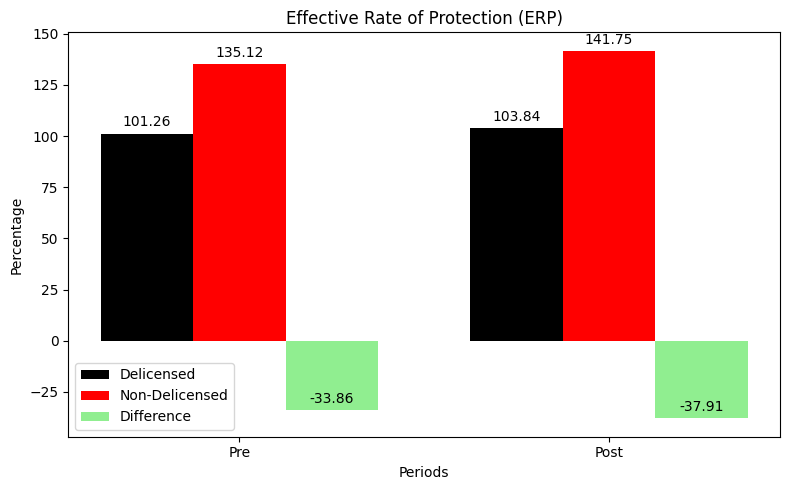

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data
periods = ['Pre', 'Post']
delicensed = [101.26, 103.84]
non_delicensed = [135.12, 141.75]
difference = [-33.86, -37.91]

x = np.arange(len(periods))  # label locations
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(8,5))

# Plotting the bars
bars1 = ax.bar(x - width, delicensed, width, label='Delicensed', color='black')
bars2 = ax.bar(x, non_delicensed, width, label='Non-Delicensed', color='red')
bars3 = ax.bar(x + width, difference, width, label='Difference', color='lightgreen')

# Labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Periods')
ax.set_title('Effective Rate of Protection (ERP)')
ax.set_xticks(x)
ax.set_xticklabels(periods)
ax.legend()

# Show values on top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

plt.tight_layout()
plt.show()
